## Product Recommendation System for e-commerce businesses
A well developed recommendation system will help businesses improve their shopper's experience on website and result in better customer acquisition and retention.

The recommendation system, I have designed below is based on the journey of a new customer from the time he/she lands on the business’s website for the first time to when he/she makes repeat purchases.

The recommendation system is designed in 3 parts based on the business context:

* **Recommendation system part I:** Product pupularity based system targetted at new customers

* **Recommendation system part II:** Model-based collaborative filtering system based on customer's purchase history and ratings provided by other users who bought items similar items

* **Recommendation system part III:** When a business is setting up its e-commerce website for the first time withou any product rating

When a new customer without any previous purchase history visits the e-commerce website for the first time, he/she is recommended the most popular products sold on the company's website. Once, he/she makes a purchase, the recommendation system updates and recommends other products based on the purchase history and ratings provided by other users on the website. The latter part is done using collaborative filtering techniques.

## Recommendation System - Part I
### Product popularity based recommendation system targeted at new customers
* Popularity based are a great strategy to target the new customers with the most popular products sold on a business's website and is very useful to cold start a recommendation engine.
[[](http://)](http://)
* **Dataset : **[Amazon product review dataset](https://www.kaggle.com/skillsmuggler/amazon-ratings)

#### Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

#### Loading the dataset

In [3]:
amazon_ratings = pd.read_csv('../input/amazon-ratings/ratings_Beauty.csv')
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [4]:
amazon_ratings.shape

(2023070, 4)

In [5]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


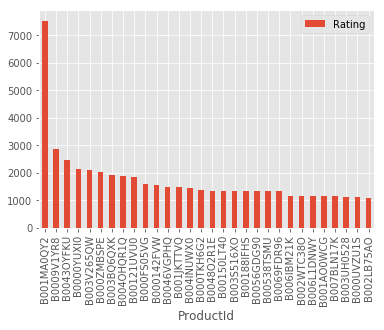

In [6]:
most_popular.head(30).plot(kind = "bar")

** Analysis:**

* The above graph gives us the most popular products (arranged in descending order) sold by the business.

* For eaxmple, product, ID # B001MA0QY2 has sales of over 7000, the next most popular product, ID # B0009V1YR8 has sales of  3000, etc.     

## Recommendation System - Part II
### Model-based collaborative filtering system

* Recommend items to users based on purchase history and similarity of ratings provided by other users who bought items to that of a particular customer.
* A model based collaborative filtering technique is closen here as it helps in making predictinfg products for a particular user by identifying patterns based on preferences from multiple user data.

#### Utility Matrix based on products sold and user reviews
**Utility Matrix : **An utlity matrix is consists of all possible user-item preferences (ratings) details represented as a matrix. The utility matrix is sparce as none of the users would buy all teh items in the list, hence, most of the values are unknown.

In [7]:
# Subset of Amazon Ratings

amazon_ratings1 = amazon_ratings.head(10000)

In [8]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As expected, the utility matrix obtaned above is sparce, I have filled up the unknown values wth 0.

In [9]:
ratings_utility_matrix.shape

(9697, 886)

Transposing the matrix

In [10]:
X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X.shape

(886, 9697)

Unique products in subset of data

In [12]:
X1 = X

### Decomposing the Matrix

In [13]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

### Correlation Matrix

In [14]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

correlation_matrix

### Isolating Product ID # 6117036094 from the Correlation Matrix

Assuming the customer buys Product ID # 6117036094 (randomly chosen)

In [15]:
X.index[99]

'6117036094'

Index # of product ID purchased by customer

In [16]:
i = "6117036094"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [17]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

### Recommending top 10 highly correlated products in sequence

In [18]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:9]

['0733001998',
 '1304139220',
 '130414089X',
 '130414674X',
 '1304174778',
 '1304196046',
 '1304196062',
 '1304196070',
 '1304196135']

**Product Id # **
Here are the top 10 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website. 

## Recommendation System - Part III
* For a business without any user-item purchase history, a search engine based recommendation system can be designed for users. The product recommendations can be based on textual clustering analysis given in product description.
* **Dataset : **[Home Depot's dataset with product dataset.](https://www.kaggle.com/c/home-depot-product-search-relevance/data)

In [19]:
# Importing libraries

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

### Item to item based recommendation system based on product description

Applicable when business is setting up its E-commerce website for the first time

In [24]:
import zipfile

# Read the zip file from input
with zipfile.ZipFile('../input/home-depot-product-search-relevance/product_descriptions.csv.zip', 'r') as zip_ref:
    # Extract the contents of the zip file
    zip_ref.extractall('/kaggle/working/')

In [25]:

product_descriptions = pd.read_csv('product_descriptions.csv')
product_descriptions.shape

(124428, 2)

#### Checking for missing values

In [26]:
# Missing values

product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [27]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

#### Feature extraction from product descriptions

Converting the text in product description into numerical data for analysis

In [28]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

#### Visualizing product clusters in subset of data

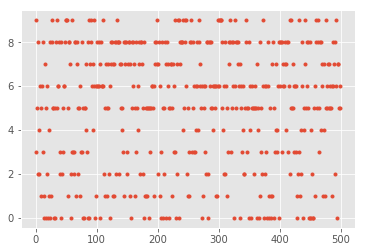

In [29]:
# Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()


F

In [30]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

## Output
* Recommendation of product based on the current product selected by user.
* To recommend related product based on, Frequently bought together. 

#### Top words in each cluster based on product description

In [31]:
# # Optimal clusters is 

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 lithium
 m12
 tool
 battery
 ion
 volt
 max
 motor
 charge
 free
Cluster 1:
 door
 aluminum
 frame
 easy
 cut
 ladder
 window
 roller
 use
 concrete
Cluster 2:
 water
 toilet
 flush
 design
 tank
 bowl
 features
 performance
 use
 cutting
Cluster 3:
 proposition
 nbsp
 residents
 california
 65
 wood
 painted
 ft
 paint
 used
Cluster 4:
 watering
 bamboo
 plants
 outdoor
 rug
 water
 vary
 ft
 landscape
 easy
Cluster 5:
 light
 led
 power
 watt
 volt
 unit
 50
 use
 lighting
 fixture
Cluster 6:
 nickel
 finish
 light
 decor
 watt
 fan
 brushed
 wall
 home
 hampton
Cluster 7:
 air
 ft
 cooling
 insulation
 helps
 snow
 easy
 sq
 power
 control
Cluster 8:
 water
 cooking
 oven
 cu
 cycle
 steel
 gas
 ft
 control
 easy
Cluster 9:
 color
 post
 laminate
 tile
 design
 wall
 kitchen
 finish
 offers
 fence


#### Predicting clusters based on key search words

In [32]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

* **Keyword : ** cutting tool

In [33]:
show_recommendations("cutting tool")

Cluster 1:
 door
 aluminum
 frame
 easy
 cut
 ladder
 window
 roller
 use
 concrete


* **Keyword : **spray paint

In [34]:
show_recommendations("spray paint")

Cluster 3:
 proposition
 nbsp
 residents
 california
 65
 wood
 painted
 ft
 paint
 used


* **Keyword : **steel drill

In [35]:
show_recommendations("steel drill")

Cluster 1:
 door
 aluminum
 frame
 easy
 cut
 ladder
 window
 roller
 use
 concrete


In case a word appears in multiple clusters, the algorithm chooses the cluster with the highest frequency of occurance of the word.

* **Keyword : **water

In [36]:
show_recommendations("water")

Cluster 2:
 water
 toilet
 flush
 design
 tank
 bowl
 features
 performance
 use
 cutting


Once a cluster is identified based on the user's search words, the recommendation system can display items from the corresponding product clusters based on the product descriptions.

#### Summary: 

This works best if a business is setting up its e-commerce website for the first time and does not have user-item purchase/rating history to start with initally. This recommendation system will help the users get a good recommendation to start with and once the buyers have a purchased history, the recommendation engine can use the model based collaborative filtering technique.